In [217]:
import warnings
warnings.filterwarnings("ignore")

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import sklearn.datasets

# 1. Gaussian Density Estimation

가우시안 밀도추정법은 모든 데이터가 하나의 가우시안 분포로부터 생성됨을 가정합니다. 가우시안 밀도추정법은 주어진 정상 데이터들을 통해 가우시안 분포의 평균 벡터와 공분산 행렬을 추정하며 학습합니다. 학습 후에는 새로운 데이터에 대한 생성 확률을 구하고, 이 확률이 낮을수록 이상치에 가까운 것으로 판정하고 테스트합니다. 

In [219]:
mu, sigma = 0, 2
data = np.random.normal(mu, sigma, 1000)


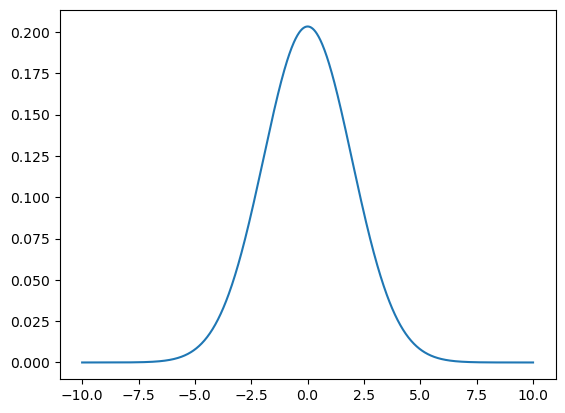

In [220]:
x = np.linspace(start=-10, stop=10, num=1000)

uni_g = stats.norm(np.mean(data), np.std(data)).pdf(x)
plt.plot(x, uni_g)
plt.show()

임의의 정규분포 난수를 생성하여 가우시안 분포의 양끝단을 이상치로 설정하였습니다.

In [221]:
n = 0
m = 0

for i in range(len(data)):
    if (stats.norm(np.mean(data), np.std(data)).pdf(data[i])) > 0.05 and \
            (stats.norm(np.mean(data), np.std(data)).pdf(data[i])) < 0.995:
        n=n+1
    else:
        m=m+1

print("정상 데이터 개수:",n)
print("비정상 데이터 개수:",m)


정상 데이터 개수: 904
비정상 데이터 개수: 96


# 2. Mixture of Gaussian

앞선 가우시안 밀도추정법은 데이터의 분포가 가우시안 분포를 따른다는 가정을 하고 있기 때문에 복잡한 데이터의 분포는 잘 표현하지 못할 수 있습니다. 따라서 여러 개의 가우시안 분포의 결합으로 데이터 분포를 나타내는 MoG(Mixtire of Gaussian)을 사용할 수 있습니다.

MoG, 혼합가우시안 밀도 추정법은 멀티 모달 분포를 다르며, 정규분포의 선형 결합으로 이루어져 있습니다. 이는 단일 가우시안 분포보다는 작은 분산을 가지지만 학습을 위해서는 보다 많은 데이터를 필요로한다는 특성을 지니고 있습니다.

In [222]:
# from sklearn.datasets._samples_generator import make_blobs

# X, y_true = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=2022)
# X_append, y_true_append = make_blobs(n_samples=50,centers=5, cluster_std=5, random_state=2022)
# X = np.vstack([X,X_append])
# y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
# X = X[:, ::-1] # flip axes for better plotting
# plt.scatter(X[:,0],X[:,1],marker="x")
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize

iris = datasets.load_iris()
scaler = StandardScaler()

X = iris["data"][:, [2, 3]]  # petal length, petal width
y = iris["target"]

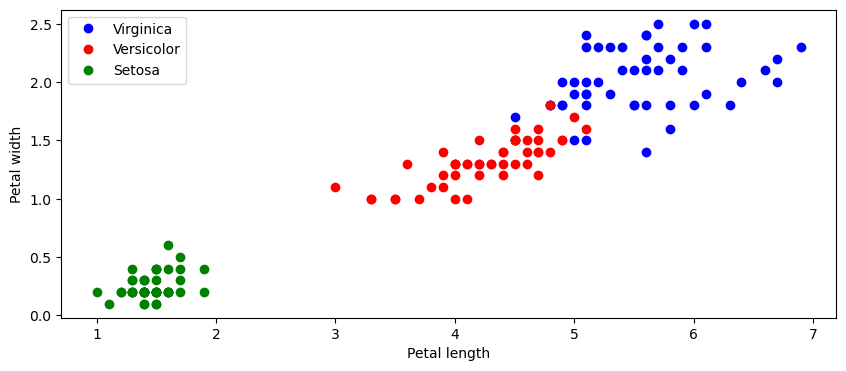

In [223]:
plt.figure(figsize=(10, 4))
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "bo", label="Virginica")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ro", label="Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "go", label="Setosa")
plt.legend(loc="upper left", fontsize=10)
plt.xlabel("Petal length", fontsize=10)
plt.ylabel("Petal width", fontsize=10)

plt.show()

MoG는 Gaussian Density Estimation과 마찬가지로 Covariance matrix type에 따라서 다른 이상치 탐지를 하기 때문에 3가지 경우를 나누어서 실험하였습니다.

In [224]:
from sklearn.mixture import GaussianMixture

gausMix_diag = GaussianMixture(n_components=1, covariance_type='diag').fit(X)
gausMix_spherical = GaussianMixture(n_components=1, covariance_type='spherical').fit(X)
gausMix_full = GaussianMixture(n_components=1, covariance_type='full').fit(X)


In [225]:
scores_diag = gausMix_diag.score_samples(X)
print(scores_diag)

scores_spherical = gausMix_spherical.score_samples(X)
print(scores_spherical)

scores_full = gausMix_full.score_samples(X)
print(scores_full)

[-3.89131051 -3.89131051 -3.96910076 -3.81675075 -3.89131051 -3.36566771
 -3.72681951 -3.81675075 -3.89131051 -3.99856876 -3.81675075 -3.74542149
 -4.07312852 -4.31619074 -4.0501215  -3.50509575 -3.65744575 -3.72681951
 -3.51283171 -3.65225975 -3.67732272 -3.50509575 -4.22185446 -3.23583071
 -3.55081665 -3.74542149 -3.43376648 -3.81675075 -3.89131051 -3.74542149
 -3.74542149 -3.50509575 -3.99856876 -3.89131051 -3.81675075 -4.0501215
 -3.96910076 -4.07312852 -3.96910076 -3.81675075 -3.80460976 -3.80460976
 -3.96910076 -3.19141948 -3.23916164 -3.72681951 -3.74542149 -3.89131051
 -3.81675075 -3.89131051 -2.30622842 -2.29525995 -2.41698489 -2.14625081
 -2.32084544 -2.22572091 -2.41042145 -2.19631729 -2.25130641 -2.16615428
 -2.17318697 -2.23788641 -2.17189477 -2.30622842 -2.14082358 -2.22947192
 -2.29525995 -2.18132781 -2.29525995 -2.13981724 -2.61596898 -2.14625081
 -2.41698489 -2.27134339 -2.1842414  -2.22947192 -2.3382749  -2.5943394
 -2.29525995 -2.17318697 -2.13684518 -2.16297861 -2.1

이상치의 기준을 백분율 0.1으로 두고 벗어나면 이상치로 가정합니다.

In [226]:
thresh_diag = np.quantile(scores_diag, 0.1)
print(thresh_diag)

thresh_spherical = np.quantile(scores_spherical, 0.1)
print(thresh_spherical)

thresh_full = np.quantile(scores_full, 0.1)
print(thresh_full)


-3.9985687614130994
-4.310938230445703
-2.9776856709660375


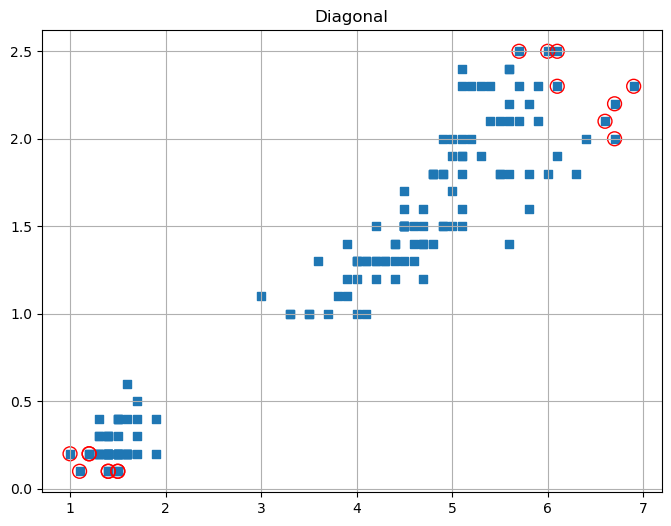

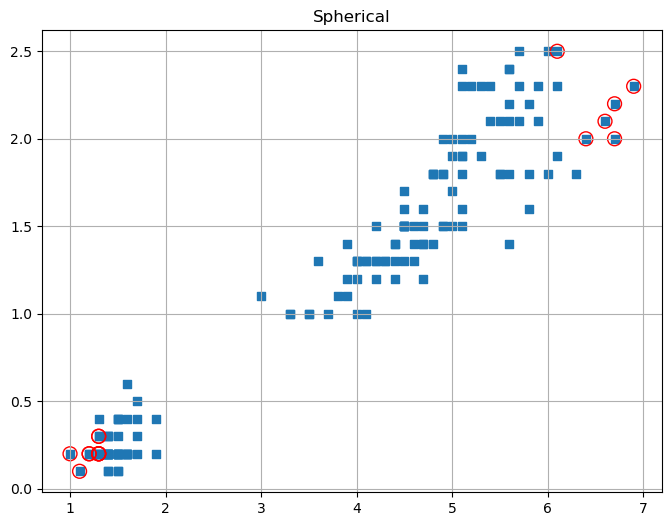

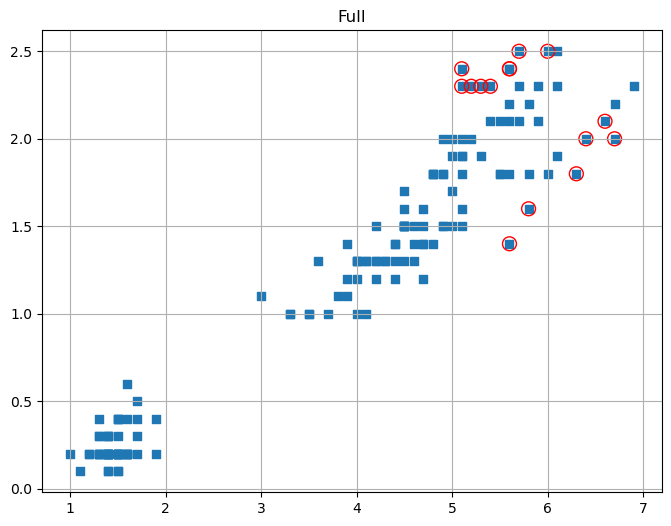

In [227]:
index_diag = np.where(scores_diag <= thresh_diag)
# Circling of anomalies
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('Diagonal')
plt.scatter(X[:,0],X[:,1],marker="s")
plt.scatter(X[index_diag,0],X[index_diag,1],marker="o",facecolor="none",edgecolor="r",s=100)

index_spherical = np.where(scores_spherical <= thresh_spherical)
# Circling of anomalies
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('Spherical')
plt.scatter(X[:,0],X[:,1],marker="s")
plt.scatter(X[index_spherical,0],X[index_spherical,1],marker="o",facecolor="none",edgecolor="r",s=100)

index_full = np.where(scores_full <= thresh_full)
# Circling of anomalies
plt.figure(figsize=(8,6))
plt.grid(True)
plt.title('Full')
plt.scatter(X[:,0],X[:,1],marker="s")
plt.scatter(X[index_full,0],X[index_full,1],marker="o",facecolor="none",edgecolor="r",s=100)


### 실험결과

Mixture of Gaussian을 통해서 이상치 탐지를 했을 경우 다음과 같이 나타납니다. Covariance matrix에 따라 나누어봤을 때 Diagonal의 경우에는 좌측하단을 주로 이상치로 분류하고 우측 하단과 상단에 조금씩 이상치로 분류한 모습을 볼 수 있습니다. Spherical일 경우 Diagonal이 이상치로 분류했던 것에 더해 우측 하단과 상단에 조금 더 많은 이상치를 두었으며, 마지막으로 Full일 경우에는 Spherical, Diagonal이 탐지하지 않은 좌측 상단 부분을 탐지하고 우측 상단은 이상치로 탐지하지 않은 모습을 볼 수 있습니다. 정밀함으로 따져보았을 때 Full > Diagonal > Spherical 순으로 나타난 것을 확인할 수 있습니다. 

# 3. Kernel Density Estimation

커널 밀도 함수는 커널 함수와 데이터를 바탕으로 연속성 있는 확률 밀도함수를 추정하는 것입니다. 샘플수가 클수록, 영역의 크기가 작을수록 정확합니다. 영역을 고정시키고 영역 안의 데이터 샘플을 찾는 것이 커널 밀도 추정의 목적입니다. 
sklearn 패키지에서 제공하는 커널 밀도 함수의 커널은 gaussian, linear, tophat, cosine, epanechnikov 등이 있으며, 대역폭(bandwidth)는 0~1사이의 값을 갖을 수 있습니다. 

In [228]:
kernel_list = ['gaussian', 'linear', 'tophat', 'cosine', 'exponential']
bandwidth_list = [0.1, 0.5, 0.8]

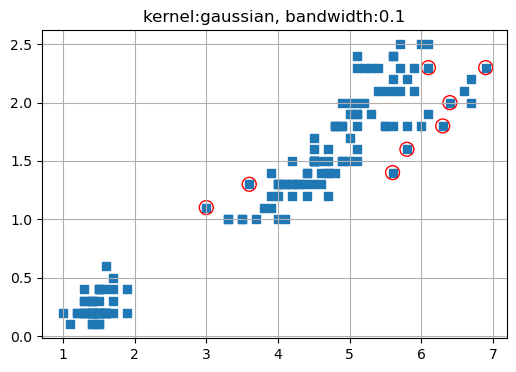

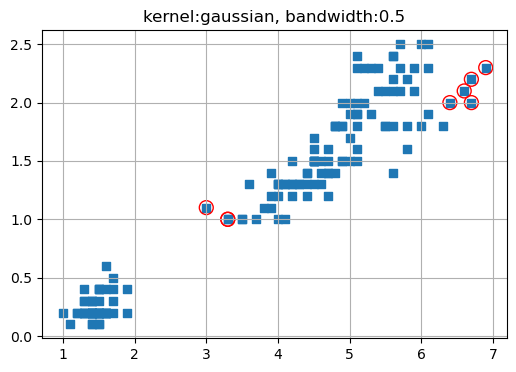

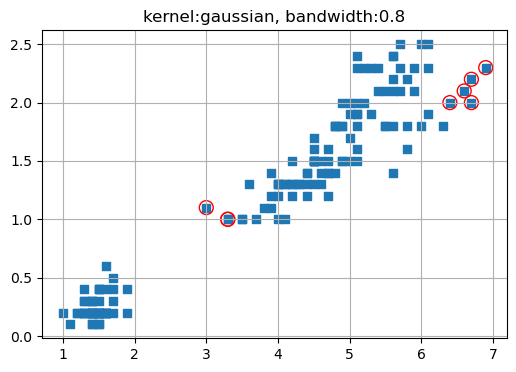

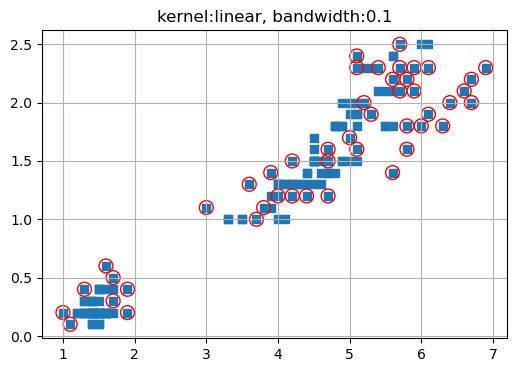

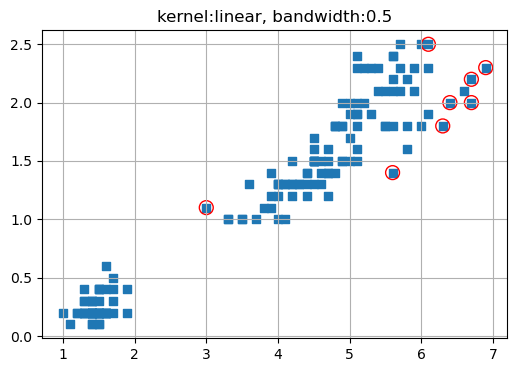

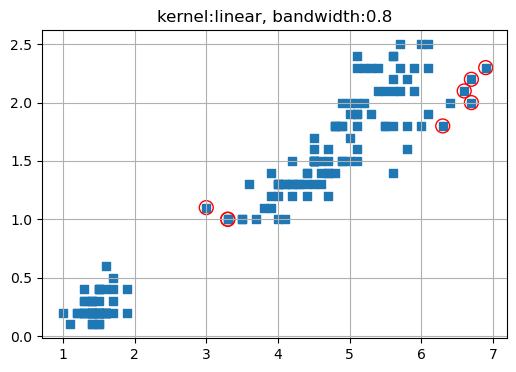

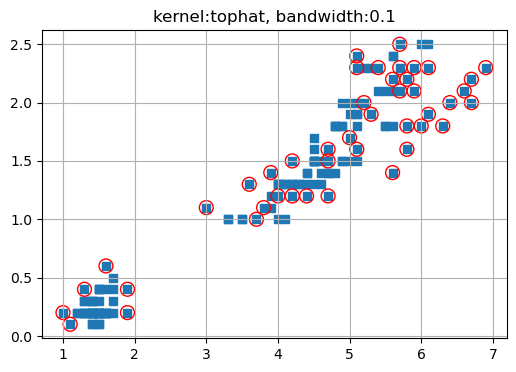

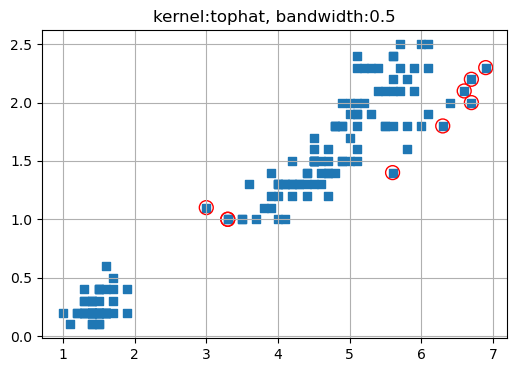

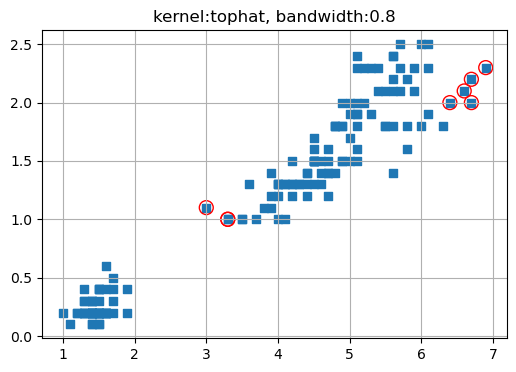

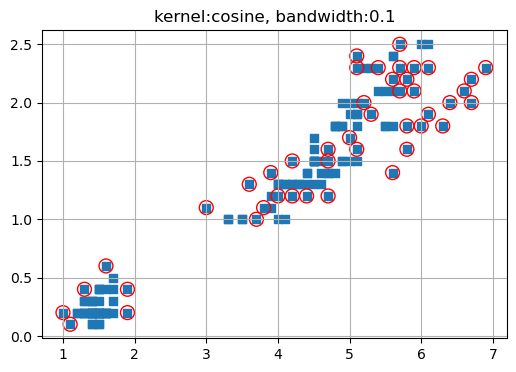

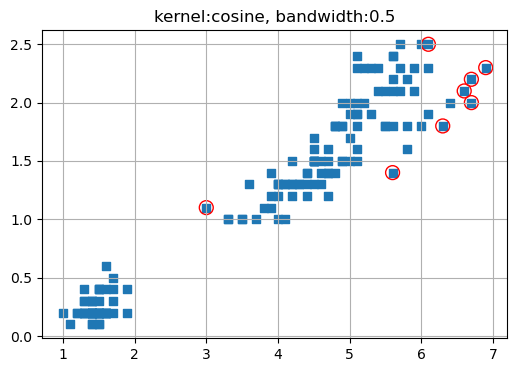

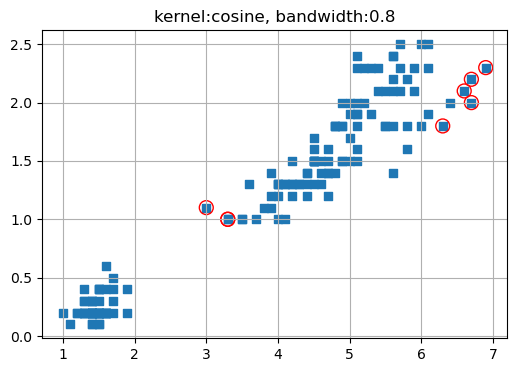

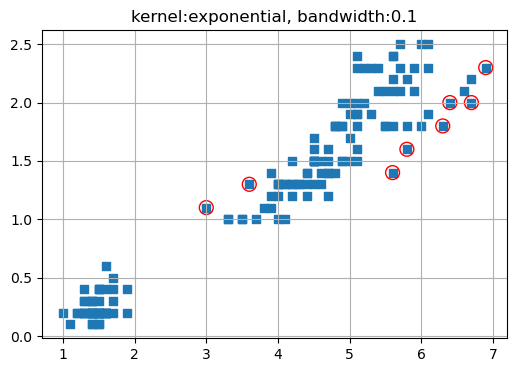

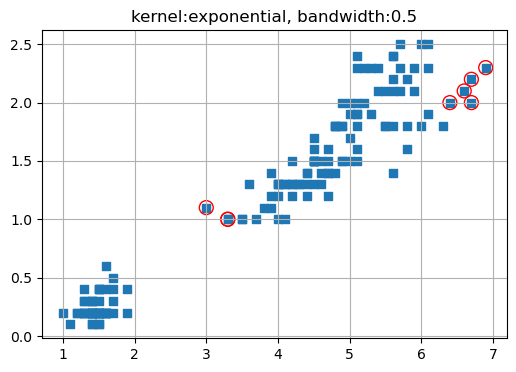

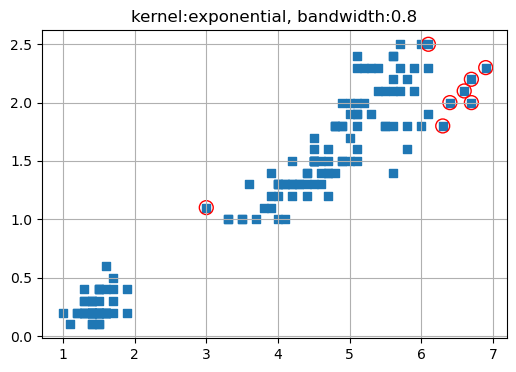

In [238]:
for kernel in kernel_list:
    for bandwidth in bandwidth_list:
        kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(X)
        scores_kde = kde.score_samples(X)
        thresh_kde = np.quantile(scores_kde, 0.05)
        index_kde = np.where(scores_kde <= thresh_kde)
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.title(f'kernel:{kernel}, bandwidth:{bandwidth}')
        plt.scatter(X[:,0],X[:,1],marker="s")
        plt.scatter(X[index_kde,0],X[index_kde,1],marker="o",facecolor="none",edgecolor="r", s=100)
        

## 실험결과
먼저 Gaussian kernel의 경우 대역폭(bandwidth)에 따라서 이상치를 탐지하는 것이 특별한 차이를 보이지 않았습니다. 그러나 다른 linear, exponential, cosine, tophat의 경우 대역폭(bandwidth)가 작을수록 더 많은 이상치로 설정했으며, tophat, linear kernel의 경우엔 대역폭이 낮을 때 지나칠만큼 많은 이상치를 잡아낸 것을 확인할 수 있었습니다. 

# 4. Local Outlier Factors(LOF)

Local Outlier Factors(LOF)는 데이터가 갖는 상대적인 밀도까지 고려한 이상치 탐지 방법입니다. LOF는 각각의 관측치가 데이터 안에서 얼마나 벗어나 있는가에 따라 이상치 정도를 나타냅니다. LOF의 가장 중요한 특징은 모든 데이터를 전체적으로 고려하는 것이 아닌 해당 관측치의 주변 데이터(neighbors)를 이용하여 local 관점으로 이상치 정도를 파악합니다. 

In [230]:
from sklearn.neighbors import LocalOutlierFactor

lof_outlier = LocalOutlierFactor(n_neighbors=10, novelty=True).fit(X)


In [241]:
neighbors_list = [2, 5, 10]

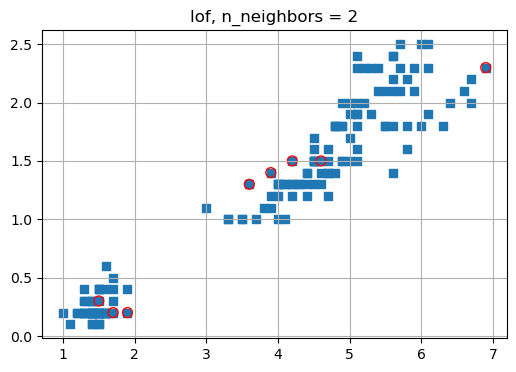

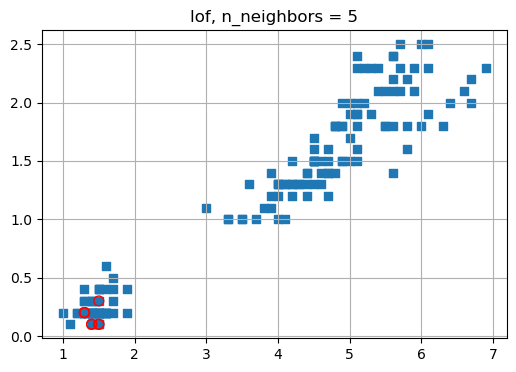

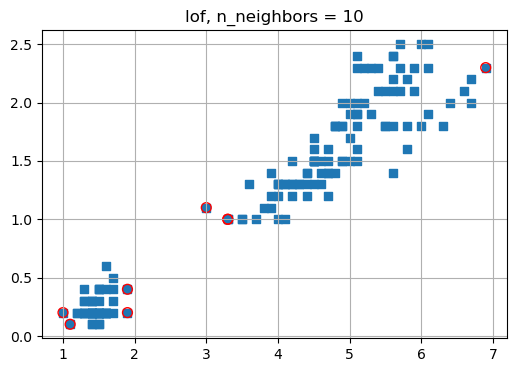

In [244]:
for n_neighbors in neighbors_list:
    lof_outlier = LocalOutlierFactor(n_neighbors=n_neighbors, novelty=True).fit(X)
    scores_lof = lof_outlier.score_samples(X)
    thresh_lof = np.quantile(scores_lof, 0.05)
    index_lof = np.where(scores_lof <= thresh_lof)
    plt.figure(figsize= (6,4))
    plt.grid(True)
    plt.title(f'lof, n_neighbors = {n_neighbors}')
    plt.scatter(X[:,0], X[:,1], marker="s")
    plt.scatter(X[index_lof,0], X[index_lof,1], marker="o", facecolor="none", edgecolor="r", s=50)

## 실험결과
LOF(Local outlier factor)는 특정 데이터의 주변부 밀도를 고려합니다. 앞선 방법론들과 비교하였을 떄 가장 이상치를 잘 탐지한 것으로 볼 수 있을 것 같습니다.
LOF(Local outlier factor)의 경우에는 하이퍼 파라미터인 K 값에 따라 전혀 다른 모양의 이상치 탐지 형태를 보여줬습니다. 하지만 n_neighbors의 수가 10일 때 가장 이상적인 이상치 탐지 형태를 보였습니다.